In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# 1.Introduction
# Problem Definition: Sentiment Analysis and Movie Recommendation

The objective of this project is to build a machine learning model that performs sentiment analysis on movie reviews and uses the sentiment analysis results to recommend movies to users. The project involves preprocessing and analyzing a dataset containing movie reviews and related information, as well as creating a predictive model to determine the sentiment of a given review. Additionally, the project aims to build a recommendation system that suggests movies to users based on their preferences and historical data..
​

# About Project:
The project aims to deliver a functional sentiment analysis and movie recommendation system that enables users to analyze movie reviews, determine the sentiment, and receive personalized movie suggestions based on their preferences. The system should exhibit accurate sentiment classification and provide valuable insights into user preferences, enhancing the movie-watching experience for users.

# Prepare Data for Consumption

## Import Libraries and Get the Data
Let's import all necessary libraries for the analysis
In this code, several Python libraries are imported for data preprocessing, machine learning, and evaluation.

In this code, the pandas library is used to read in two CSV files and store them in DataFrame objects
we can quickly check the size of the data that has been loaded

In [2]:
# Read train.csv and movies.csv files
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

# Perform inner join on 'movieId' column
#merged_data = pd.merge(train_data, movies_data)


In [3]:
print("train =", train.shape,train.columns)
print("movies =", movies.shape,movies.columns)
print("test =", test.shape,test.columns)

train = (162758, 5) Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')
movies = (143258, 14) Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')
test = (55315, 4) Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText'], dtype='object')


# 2.Data Collection 


## display a summary of the data types and non-null values for each column in the DataFrame train and movies


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [5]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [7]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


# 3.Exploratory Data Analysis


a horizontal bar graph where each bar represents the missing percentage of a column in the train DataFrame. The columns are sorted in descending order of missing percentage for better visualization.

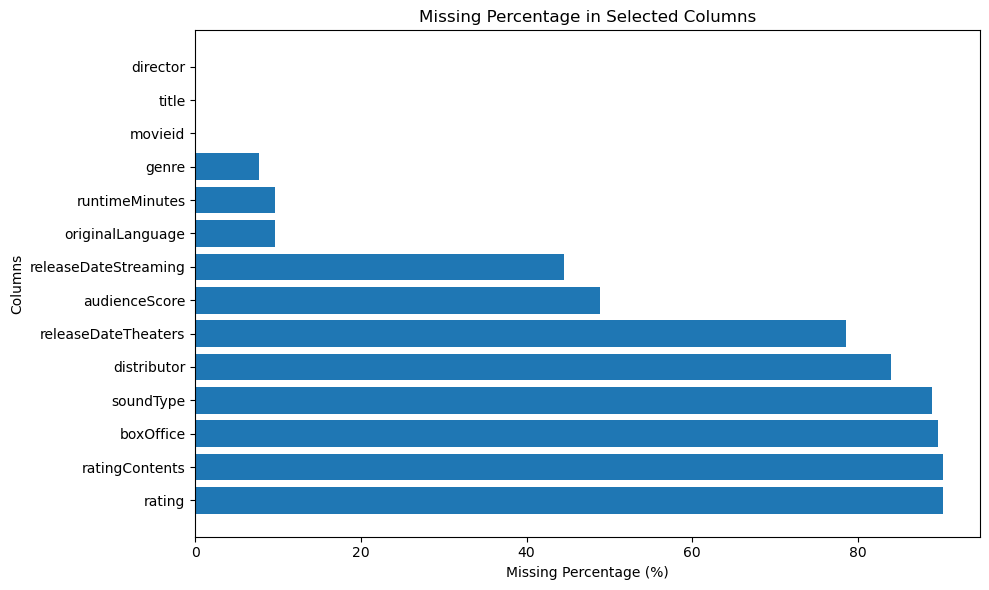

In [8]:
import matplotlib.pyplot as plt

# Define the columns to visualize (you can adjust this based on your preference)
columns_to_visualize = ['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'
]

# Calculate the missing percentage for the selected columns
missing_percentage = [(column, round(percentage*100, 2)) for column, percentage in movies[columns_to_visualize].isnull().mean().items()]

# Sort the list based on missing percentage
missing_percentage = sorted(missing_percentage, key=lambda x: x[1], reverse=True)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in missing_percentage], [item[1] for item in missing_percentage])
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Columns')
plt.title('Missing Percentage in Selected Columns')
plt.tight_layout()
plt.show()

In [9]:
for column in movies.columns:
    percentage = movies[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

movieid: 0.0%
title: 0.0%
audienceScore: 48.87%
rating: 90.23%
ratingContents: 90.23%
releaseDateTheaters: 78.52%
releaseDateStreaming: 44.56%
runtimeMinutes: 9.65%
genre: 7.74%
originalLanguage: 9.67%
director: 0.0%
boxOffice: 89.71%
distributor: 83.94%
soundType: 88.89%


# Remove the columns which have more missing values

In [10]:
movies  = movies .drop(columns = 'releaseDateTheaters')
movies  = movies .drop(columns = 'rating')
movies  = movies .drop(columns = 'ratingContents')
movies  = movies .drop(columns = 'boxOffice')
movies  = movies .drop(columns = 'soundType')
movies  = movies .drop(columns = 'distributor')

In [11]:
movies.shape

(143258, 8)

## identify duplicate movieid values in the movies DataFrame. 

In [12]:
duplicate_movie_ids = movies['movieid'][movies['movieid'].duplicated()]
print(duplicate_movie_ids)


495                          hulk_chronicles_frodo_baggins
544                      bruce_wayne_heroic_voyage_elegant
928             captain_jack_sparrow_scarlett_o'hara_vivid
1126           escape_the_terminator_tyler_durden_astonish
1487      golden_forrest_gump_surreal_captain_jack_sparrow
                                ...                       
143214                   superman_katniss_everdeen_kingdom
143220      marvelous_marty_mcfly_james_t._kirk_james_bond
143226       dracula_golden_captain_america_ferris_bueller
143229                         rick_blaine_epic_mr._miyagi
143257                                   lara_croft_voyage
Name: movieid, Length: 16854, dtype: object


In [13]:
print(len(duplicate_movie_ids))

16854


## remove duplicate rows from the movies DataFrame and  perform a left merge between the test and train DataFrames and the movies_deduplicated DataFrame based on the movieid column.

In [14]:
movies_deduplicated = movies.drop_duplicates(subset='movieid')
movies_deduplicated.shape

(126404, 8)

In [15]:

merged_test = pd.merge(test, movies_deduplicated, on='movieid', how='left')
print(merged_test.shape)
merged_train = pd.merge(train, movies_deduplicated, on='movieid', how='left')
print(merged_train.shape)


(55315, 11)
(162758, 12)


In [16]:
for column in merged_train.columns:
    percentage = merged_train[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

movieid: 0.0%
reviewerName: 0.0%
isFrequentReviewer: 0.0%
reviewText: 3.96%
sentiment: 0.0%
title: 0.0%
audienceScore: 8.14%
releaseDateStreaming: 9.94%
runtimeMinutes: 2.07%
genre: 1.5%
originalLanguage: 2.02%
director: 0.0%


In [17]:
merged_train.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director'],
      dtype='object')

## represent the missing percentage of a column in the merged_train DataFrame after removing the columns

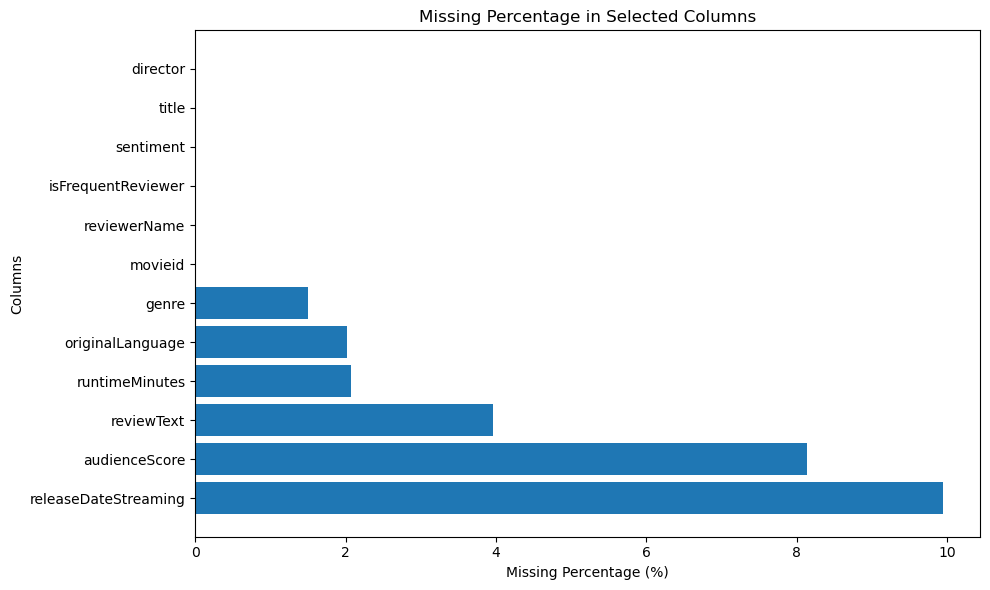

In [18]:
import matplotlib.pyplot as plt

# Define the columns to visualize (you can adjust this based on your preference)
columns_to_visualize = ['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director'
]

# Calculate the missing percentage for the selected columns
missing_percentage = [(column, round(percentage*100, 2)) for column, percentage in merged_train[columns_to_visualize].isnull().mean().items()]

# Sort the list based on missing percentage
missing_percentage = sorted(missing_percentage, key=lambda x: x[1], reverse=True)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in missing_percentage], [item[1] for item in missing_percentage])
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Columns')
plt.title('Missing Percentage in Selected Columns')
plt.tight_layout()
plt.show()




In [19]:
merged_test = merged_test.rename(columns={'isTopCritic': 'isFrequentReviewer'})


In [20]:
merged_train = merged_train.drop(columns = 'movieid')
merged_test = merged_test.drop(columns = 'movieid')

In [21]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reviewerName          162758 non-null  object 
 1   isFrequentReviewer    162758 non-null  bool   
 2   reviewText            156311 non-null  object 
 3   sentiment             162758 non-null  object 
 4   title                 162758 non-null  object 
 5   audienceScore         149510 non-null  float64
 6   releaseDateStreaming  146573 non-null  object 
 7   runtimeMinutes        159382 non-null  float64
 8   genre                 160320 non-null  object 
 9   originalLanguage      159468 non-null  object 
 10  director              162758 non-null  object 
dtypes: bool(1), float64(2), object(8)
memory usage: 13.8+ MB


In [22]:
print(merged_train['reviewerName'].nunique())
print(merged_train['isFrequentReviewer'].nunique())
print(merged_train['audienceScore'].nunique())
print(merged_train['releaseDateStreaming'].nunique())
print(merged_train['runtimeMinutes'].nunique())
print(merged_train['genre'].nunique())
print(merged_train['originalLanguage'].nunique())
print(merged_train['director'].nunique())


4482
2
100
2899
216
1162
91
9476


## transform categorical columns in the merged_train DataFrame. Each unique category in the categorical column is assigned a unique integer label.

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns in the train data
categorical_columns = ['reviewerName', 'isFrequentReviewer', 'title',
        'releaseDateStreaming',
       'genre', 'originalLanguage', 'director']
for column in categorical_columns:
    merged_train[column] = label_encoder.fit_transform(merged_train[column])


In [24]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reviewerName          162758 non-null  int64  
 1   isFrequentReviewer    162758 non-null  int64  
 2   reviewText            156311 non-null  object 
 3   sentiment             162758 non-null  object 
 4   title                 162758 non-null  int64  
 5   audienceScore         149510 non-null  float64
 6   releaseDateStreaming  162758 non-null  int64  
 7   runtimeMinutes        159382 non-null  float64
 8   genre                 162758 non-null  int64  
 9   originalLanguage      162758 non-null  int64  
 10  director              162758 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 14.9+ MB


In [25]:
merged_train  = merged_train .drop(columns = 'sentiment')
merged_train = merged_train.replace(np.nan,'0')

In [26]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewerName          162758 non-null  int64 
 1   isFrequentReviewer    162758 non-null  int64 
 2   reviewText            162758 non-null  object
 3   title                 162758 non-null  int64 
 4   audienceScore         162758 non-null  object
 5   releaseDateStreaming  162758 non-null  int64 
 6   runtimeMinutes        162758 non-null  object
 7   genre                 162758 non-null  int64 
 8   originalLanguage      162758 non-null  int64 
 9   director              162758 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 13.7+ MB


## The pipeline preprocess  both numerical and categorical features, as well as TF-IDF transformation for text features.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
ordinal_encoder = OrdinalEncoder()

numerical_fea = ['reviewerName','isFrequentReviewer','title','releaseDateStreaming','genre', 
                 'audienceScore','runtimeMinutes','originalLanguage','director',]

#numerical_fea = ['audienceScore','runtimeMinutes']
cat_fea = ['audienceScore','runtimeMinutes']

#cat_fea = ['reviewerName','isFrequentReviewer','releaseDateStreaming','genre', 'originalLanguage','director',]
tfidf_fea = 'reviewText'

num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    #('encoder', OrdinalEncoder())
])
tfidf_trans = Pipeline(steps=[
    ('tfidf',TfidfVectorizer())

])


## create a ColumnTransformer named preprocessor that encapsulates the different preprocessing steps

In [28]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
                             transformers=[
                                 ('tfidf',tfidf_trans, tfidf_fea),
                                 ('cat',cat_trans, cat_fea),
                                 ('num',num_trans, numerical_fea)
                             ])

In [29]:
preprocessor

ColumnTransformer(transformers=[('tfidf',
                                 Pipeline(steps=[('tfidf', TfidfVectorizer())]),
                                 'reviewText'),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['audienceScore', 'runtimeMinutes']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['reviewerName', 'isFrequentReviewer', 'title',
                                  'releaseDateStreaming', 'genre',
                                  'audienceScore', 'runtimeMinutes',
                                  'originalLanguage', 'director'])])

In [30]:
#merged_train = merged_train.replace(np.nan,'0')


# 4.Feature Engineering


In [31]:
prep=preprocessor.fit(merged_train)
X = prep.transform(merged_train)

In [32]:
y = label_encoder.fit_transform(train['sentiment'])

In [33]:
train.sentiment.value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

In [34]:
X.shape

(162758, 65231)

In [35]:
type(X)

scipy.sparse._csr.csr_matrix

In [36]:
X

<162758x65231 sparse matrix of type '<class 'numpy.float64'>'
	with 4849096 stored elements in Compressed Sparse Row format>

## transform categorical columns in the merged_test DataFrame. Each unique category in the categorical column is assigned a unique integer label.

In [37]:
categorical_columns = ['reviewerName', 'isFrequentReviewer', 'title',
        'releaseDateStreaming',
       'genre', 'originalLanguage', 'director']
for column in categorical_columns:
    merged_test[column] = label_encoder.fit_transform(merged_test[column])


In [38]:
merged_test = merged_test.replace(np.nan,'0')
#preprocessor=preprocessor.fit(merged_test)

X_test=prep.transform(merged_test)

In [39]:
X_test.shape

(55315, 65231)

In [40]:
type(X_test)

scipy.sparse._csr.csr_matrix

In [41]:
X_test

<55315x65231 sparse matrix of type '<class 'numpy.float64'>'
	with 1632046 stored elements in Compressed Sparse Row format>

# 5.Model Development

In [42]:
# from sklearn.linear_model import LinearRegression
# baseline_model_lr = LinearRegression()
# baseline_model_lr.fit(X, y)


In [43]:

# from sklearn.linear_model import LogisticRegression
# logr = LogisticRegression()
# logr.fit(X,y)



In [44]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# # Polynomial Regression
# poly_features = PolynomialFeatures(degree=1)  # Adjust the degree as needed
# X_train_poly = poly_features.fit_transform(X)
# X_val_poly = poly_features.transform(X_test)

# poly_reg = LinearRegression()
# poly_reg.fit(X_train_poly, y)

# # y_val_pred_poly = poly_reg.predict(X_val_poly)
# # poly_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_poly))
# # print("Polynomial Regression RMSE:", poly_rmse)

# # Logistic Regression with Cross-Validation
# log_reg = LogisticRegression()
# log_reg_scores = cross_val_score(log_reg, X, y, cv=5)  # Adjust the number of cross-validation folds (cv) as needed
# log_reg_mean_score = log_reg_scores.mean()
# print("Logistic Regression Mean Accuracy:", log_reg_mean_score)


In [45]:
# from sklearn.model_selection import GridSearchCV

# # Hyperparameters for the model you want to tune
# param_grid = {
#     'C': [0.1, 1, 10],  # Example hyperparameters for logistic regression's regularization parameter
#     'max_iter': [100, 200, 300]  # Example hyperparameters for logistic regression's maximum number of iterations
# }

# grid_search = GridSearchCV(log_reg, param_grid, cv=5)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [46]:
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# # KNN or SVM Classification 
# knn_cls = KNeighborsClassifier(n_neighbors=5)  
# knn_cls.fit(X,y)
# y_val_pred_knn_cls = knn_cls.predict(X_val)
# knn_accuracy = accuracy_score(y_val, y_val_pred_knn_cls)
# print("KNN Accuracy:", knn_accuracy)

In [47]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'solver': ['liblinear', 'sag', 'saga'] }

In [48]:
# from sklearn.linear_model import LogisticRegression
# logr = LogisticRegression()

# grid_search = GridSearchCV(logr, param_grid, cv=5)

# grid_search.fit(X_train, y_train)


# print("Best Hyperparameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_


# accuracy = best_model.score( X_val, y_val)
# print("Baseline Model Accuracy:", accuracy)

In [49]:
# param_grid2 = {'n_neighbors': [3, 5, 7]}


In [50]:
# from sklearn.neighbors import KNeighborsClassifier
# knnc = KNeighborsClassifier()
# grid_search = GridSearchCV(knnc, param_grid2, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best Hyperparameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_val, y_val)
# print("Validation Accuracy: ", accuracy)

In [51]:
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score

# # Create a baseline model
# baseline_model = DummyClassifier(strategy='most_frequent')

# # Fit the baseline model on the training data
# baseline_model.fit(X_train, y_train)

# # Make predictions on the validation data
# y_pred = baseline_model.predict(X_val)

# # Calculate the accuracy of the baseline model
# accuracy = accuracy_score(y_val, y_pred)

# print("Baseline Model Accuracy:", accuracy)
# from sklearn.metrics import f1_score

# f1_score(y_pred,y_val,average='micro')


In [52]:
# from sklearn.ensemble import RandomForestClassifier
# # from sklearn.metrics import accuracy_score
# # from sklearn.model_selection import train_test_split

# # # Split the data into training and validation sets
# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Initialize the Random Forest Classifier
# rfc = RandomForestClassifier()

# # # Train the model
# rfc.fit(X, y)

# # Make predictions on the validation set
# y_pred = model.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Validation Accuracy:", accuracy)


In [53]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier

# from sklearn.metrics import accuracy_score
# dt_model = DecisionTreeClassifier()
# bagging_model = BaggingClassifier(dt_model, n_estimators=100)

# bagging_model.fit(X_train, y_train)

# accuracy = accuracy_score(y_val, y_pred)
# print("Decision Tree Model Accuracy:", accuracy)


In [54]:
# from sklearn.ensemble import GradientBoostingClassifier
# boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
# boosting_model.fit(X_train, y_train)


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

In [56]:

# import xgboost as xgb
# #from sklearn.metrics import accuracy_score
# # from sklearn.model_selection import train_test_split
# # from sklearn.model_selection import cross_val_score
# # from sklearn.metrics import precision_score, recall_score

# #Define the XGBoost classifier model
# Xgb = xgb.XGBClassifier()
# grid_search = GridSearchCV(Xgb, param_grid, cv=5)
# #Xgb.fit(X, y)
# grid_search.fit(X, y)
# print("Best Hyperparameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# # accuracy = xgb.score(X, y)
# print("Validation Accuracy: ", accuracy)
# # Fit the model on the training data
# xgb.fit(X_train, y_train)

# Make predictions on the validation data
# y_pred = xgb.predict(X_val)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy: ", accuracy)
# # Evaluate the model performance on the test data
# precision = precision_score(y_val, y_pred)
# recall = recall_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# # Print the evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)

# # Perform cross-validation with 5 folds
# cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Average Accuracy:", cv_scores.mean())

In [57]:
# from sklearn.ensemble import AdaBoostClassifier
# ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
# ada_model.fit(X, y)


In [58]:
import lightgbm as ltb
model = ltb.LGBMClassifier()
#model.fit(X, y)

param_grid = {
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'boosting_type': ['gbdt'],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'feature_fraction': [0.8, 0.9, 1.0]
}
grid_search_lgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_lgb.fit(X, y)
#model.fit(X, y)
#best_params = grid_search_lgb.best_params_
#best_model = grid_search_lgb.best_estimator_


In [59]:
#from sklearn.svm import SVC

# Create an SVC classifier
#svm = SVC()

# Train the model on the training data
#svm.fit(X_train, y_train)
#y_pred_svm= svm.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred_svm)
# precision = precision_score(y_val, y_pred_svm)
# recall = recall_score(y_val, y_pred_svm)
# f1 = f1_score(y_val, y_pred_svm, average='micro')
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [60]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# # Create the Multinomial Naive Bayes model
# naive_bayes = MultinomialNB()

# # Train the model
# naive_bayes.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred_nb = naive_bayes.predict(X_val)

# # Evaluate the model
# accuracy = accuracy_score(y_val, y_pred_nb)
# precision = precision_score(y_val, y_pred_nb)
# recall = recall_score(y_val, y_pred_nb)
# f1 = f1_score(y_val, y_pred_nb)

# # Print the evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


In [61]:
# from sklearn.neural_network import MLPClassifier
# mlpc = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
# mlpc.fit(X_train, y_train)
# y_pred_mlpc = mlpc.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred_mlpc)
# precision = precision_score(y_val, y_pred_mlpc)
# recall = recall_score(y_val, y_pred_mlpc)
# f1 = f1_score(y_val, y_pred_mlpc)

# # Print the evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [62]:
y_pred_test = grid_search_lgb.predict(X_test)

# Print the predictions
print(y_pred_test)

[1 1 1 ... 1 1 0]


In [63]:
y_pred_test.shape

(55315,)

In [64]:
#merged = pd.merge(train, movies)

In [65]:
sub = pd.DataFrame(columns = ['id','sentiment'])
sub['id'] = [i for i in range(len(y_pred_test))]
#sub['sentiment'] = y_pred_test.astype(bool)
sub['sentiment'] = np.where(y_pred_test.astype(bool), "POSITIVE", "NEGATIVE")
sub.to_csv('submission.csv', index = False)

In [66]:
sub.shape

(55315, 2)

In [67]:
sub.head()

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
